In [41]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [42]:
train_path4="G:\\MAIN\\Data\\gbdt8\\train"
test_path4="G:\\MAIN\\Data\\gbdt8\\test"

In [52]:
a=list(range(0,779))

In [53]:
#train data
df_label=pd.read_csv(train_path4+"/label.csv",header=None)

df_x3=pd.read_csv(train_path4+"/backborn.csv",header=None)
df_x3=df_x3.drop([70,69,68], axis=1)

df_x6=pd.read_csv(train_path4+"/KOSI.csv",header=None)
df_x7=pd.read_csv(train_path4+"/SIRI.csv",header=None)

df_x8=pd.read_csv(train_path4+"/MIGI.csv",header=None)
df_x9=pd.read_csv(train_path4+"/HIDARI.csv",header=None)

df_x10=pd.read_csv(train_path4+"/MEAN_H.csv",header=None)
df_x11=pd.read_csv(train_path4+"/MEAN_V.csv",header=None)

df_x12=pd.read_csv(train_path4+"/MODE_H.csv",header=None)
df_x13=pd.read_csv(train_path4+"/MODE_V.csv",header=None)

df_x14=pd.read_csv(train_path4+"/MED_H.csv",header=None)
df_x15=pd.read_csv(train_path4+"/MED_V.csv",header=None)

df_x16=pd.read_csv(train_path4+"/VAR_H.csv",header=None)
df_x17=pd.read_csv(train_path4+"/VAR_V.csv",header=None)

df_x18=pd.read_csv(train_path4+"/volume.csv",header=None)

train_df = pd.concat([df_x3,df_x6,df_x7,df_x8,df_x9,df_x10,df_x11,df_x14,df_x15,df_x16,df_x17,df_x18], axis=1)
train_df=train_df.set_axis(a, axis=1)
#train_df=df_x12

In [54]:
#test data
df_label_test=pd.read_csv(test_path4+"/label.csv",header=None)

df_x3_test=pd.read_csv(test_path4+"/backborn.csv",header=None)
df_x3_test=df_x3_test.drop([70,69,68],axis=1)

df_x6_test=pd.read_csv(test_path4+"/KOSI.csv",header=None)
df_x7_test=pd.read_csv(test_path4+"/SIRI.csv",header=None)

df_x8_test=pd.read_csv(test_path4+"/MIGI.csv",header=None)
df_x9_test=pd.read_csv(test_path4+"/HIDARI.csv",header=None)

df_x10_test=pd.read_csv(test_path4+"/MEAN_H.csv",header=None)
df_x11_test=pd.read_csv(test_path4+"/MEAN_V.csv",header=None)

df_x12_test=pd.read_csv(test_path4+"/MODE_H.csv",header=None)
df_x13_test=pd.read_csv(test_path4+"/MODE_V.csv",header=None)

df_x14_test=pd.read_csv(test_path4+"/MED_H.csv",header=None)
df_x15_test=pd.read_csv(test_path4+"/MED_V.csv",header=None)

df_x16_test=pd.read_csv(test_path4+"/VAR_H.csv",header=None)
df_x17_test=pd.read_csv(test_path4+"/VAR_V.csv",header=None)

df_x18_test=pd.read_csv(test_path4+"/volume.csv",header=None)


test_df = pd.concat([df_x3_test,df_x6_test,df_x7_test,df_x8_test, df_x9_test,df_x10_test,df_x11_test,df_x14_test,df_x15_test,df_x16_test,df_x17_test,df_x18_test], axis=1)
test_df=test_df.set_axis(a, axis=1)

#test_df=df_x12_test

## Light GBM

In [55]:
#train_df, test_df, df_label, df_label_test = train_test_split(train_df,df_label.T[0],test_size = 0.2,stratify=df_label.T[0])

In [56]:
trains = lgb.Dataset(train_df, np.array(df_label))
valids = lgb.Dataset(test_df, np.array(df_label_test))

X_train, X_validation, labels_train, labels_validation = train_test_split(train_df,df_label.T[0],test_size = 0.1,stratify=df_label.T[0])
train_data = lgb.Dataset(X_train, label=labels_train)
eval_data = lgb.Dataset(X_validation, label=labels_validation, reference= train_data)

In [57]:
#light gbm モデル構築
params = {
'task': 'train',
'boosting_type': 'gbdt',
"metric" : "multi_logloss",
'num_leaves': 8,
'objective': 'multiclass',
'num_class': 47,
'max_depth':6,
"seed" :1234,
'feature_fraction':0.8,
'bagging_fraction':0.8
}

lgb_results = {}
gbm = lgb.train(params=params,train_set=train_data,valid_sets = [train_data, eval_data],num_boost_round=500,early_stopping_rounds=10,evals_result=lgb_results)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180903
[LightGBM] [Info] Number of data points in the train set: 6885, number of used features: 741
[LightGBM] [Info] Start training from score -3.638603
[LightGBM] [Info] Start training from score -4.041310
[LightGBM] [Info] Start training from score -3.895458
[LightGBM] [Info] Start training from score -4.136620
[LightGBM] [Info] Start training from score -3.622165
[LightGBM] [Info] Start training from score -3.860367
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.806662
[LightGBM] [Info] Start training from score -3.672314
[LightGBM] [Info] Start training from score -3.839888
[LightGBM] [Info] Start training from score -3.985070
[LightGBM] [Info] Start training from score -3.683809
[LightGBM] [Info] Start training from score -3.853494
[Lig

In [58]:
from sklearn.metrics import accuracy_score

def gbdt_prediction(gbm,test_df,df_label_test):
  preds = gbm.predict(test_df)
  preds
  y_pred = []
  for x in preds:
    y_pred.append(np.argmax(x))
  print('acc:{:.3f}'.format(accuracy_score(df_label_test.T, y_pred)))
  return y_pred

In [59]:
gbdt_prediction(gbm,train_df,df_label)
y_pred=gbdt_prediction(gbm,test_df,df_label_test)

acc:0.976
acc:0.723


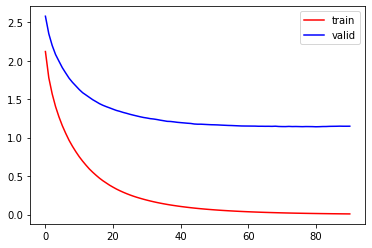

In [60]:
import matplotlib.pyplot as plt
plt.plot(lgb_results["training"]["multi_logloss"], color = "red", label = "train")
plt.plot(lgb_results["valid_1"]["multi_logloss"], color = "blue", label = "valid")
plt.legend()
plt.show()

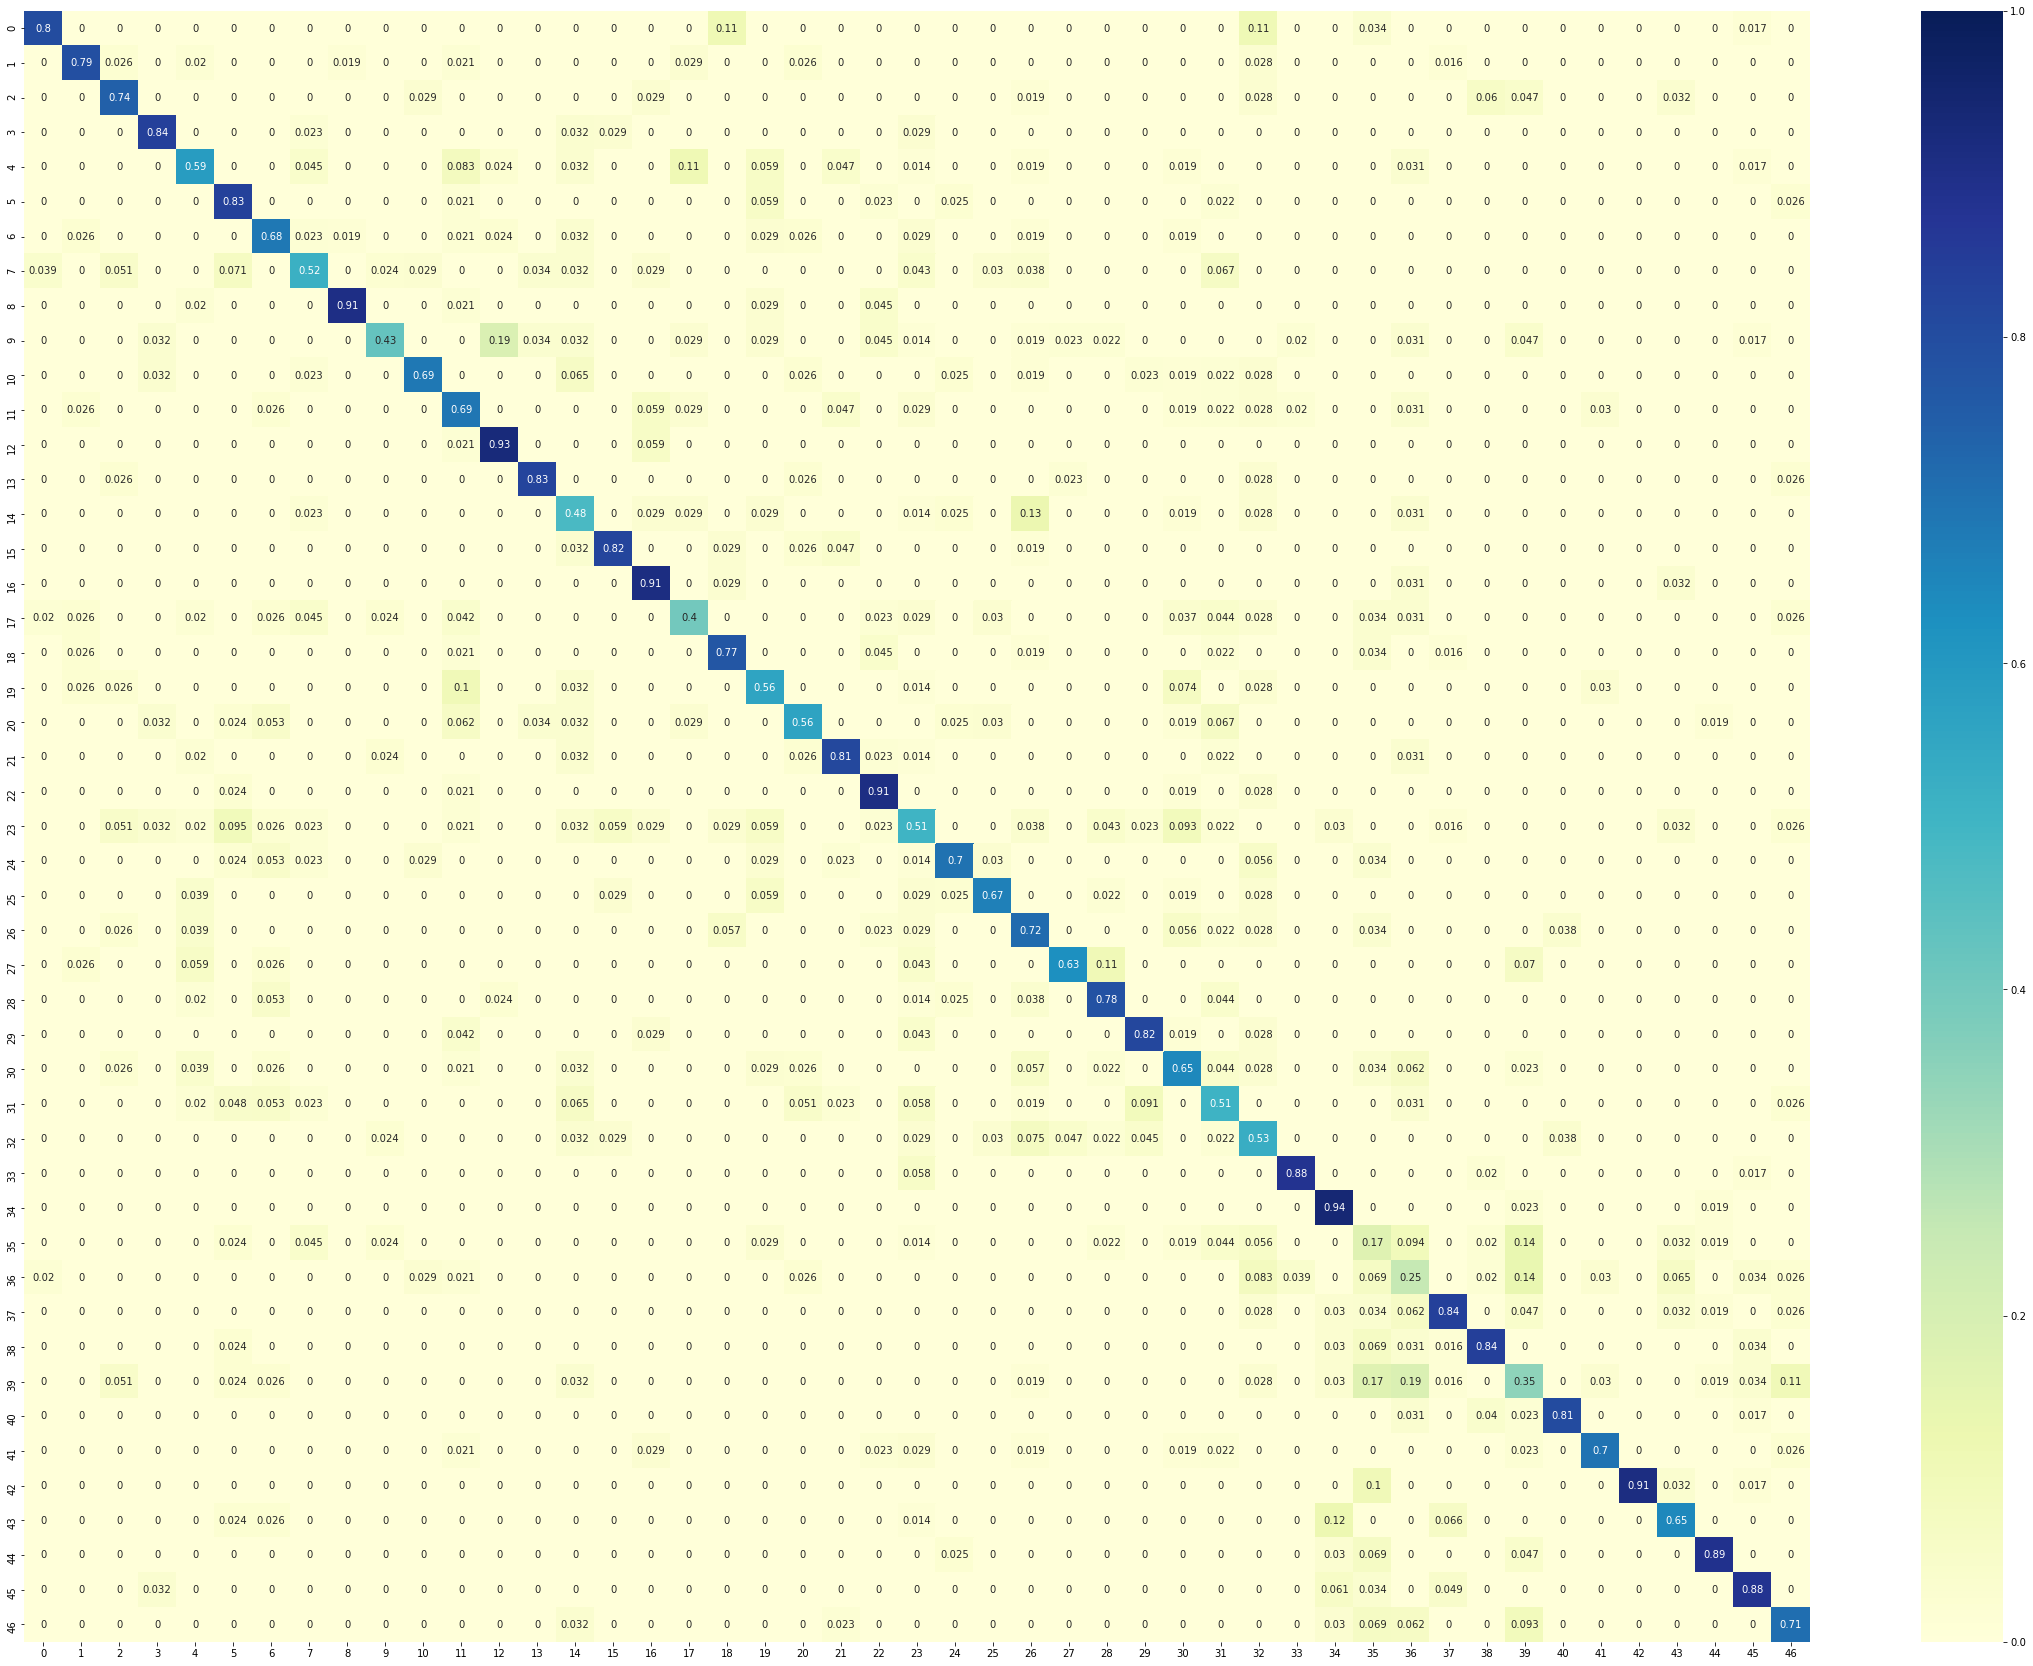

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df_label_test.T,y_pred)
lm=np.sum(cm,1)
#L=np.stack([lm,lm]).T
cm2=cm/lm

f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(cm2, vmax=1, annot=True,cmap="YlGnBu");

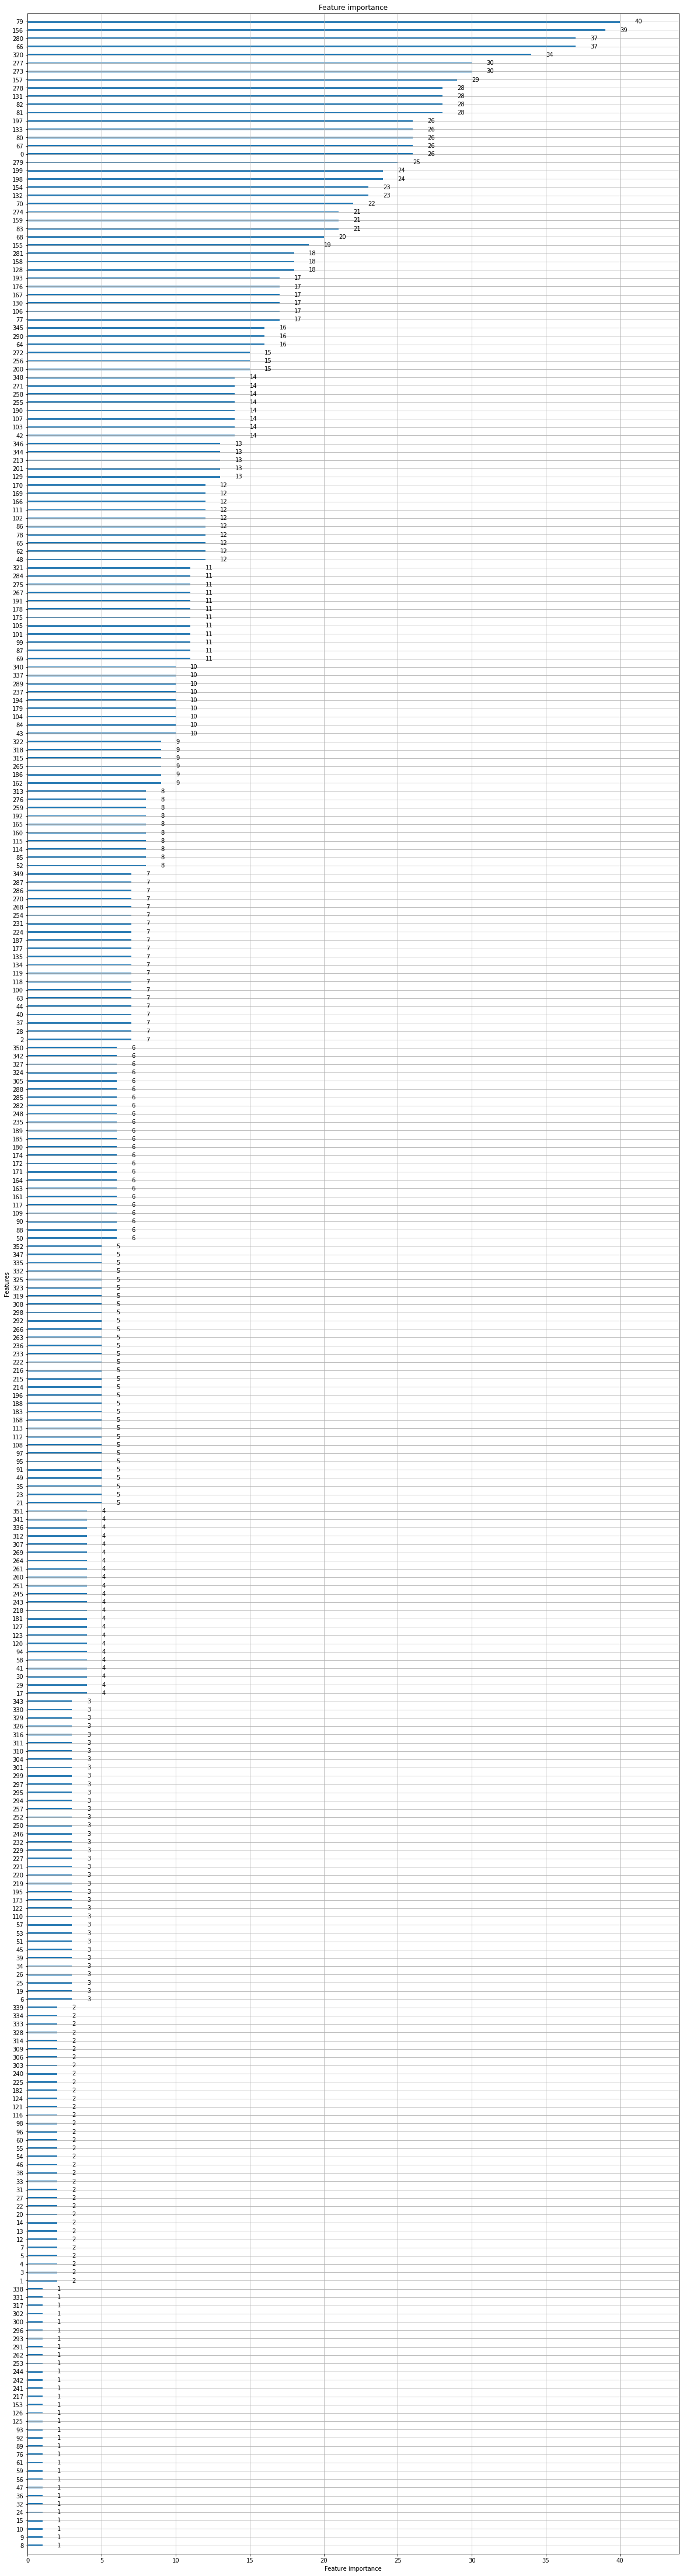

In [29]:
lgb.plot_importance(gbm, figsize=(20, 80))
plt.show()